In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import torch
import torch.nn as nn


import torch.optim as optim

import sys
sys.path.insert(0, '../libraries/')

import mnist_data_utils 
import mnist_vae_lib

import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# Load data

In [2]:
data_dir = '../mnist_data/'
propn_sample = 0.05

In [3]:
train_set, test_set = mnist_data_utils.get_mnist_dataset(data_dir, propn_sample)

In [4]:
batchsize = 12

train_loader = torch.utils.data.DataLoader(
                 dataset=train_set,
                 batch_size=batchsize,
                 shuffle=True)

test_loader = torch.utils.data.DataLoader(
                dataset=test_set,
                batch_size=batchsize,
                shuffle=False)


In [5]:
for batch_idx, d in enumerate(train_loader):
    data_train = d
    break
    
for batch_idx, d in enumerate(test_loader):
    data_test = d
    break

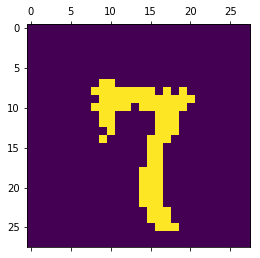

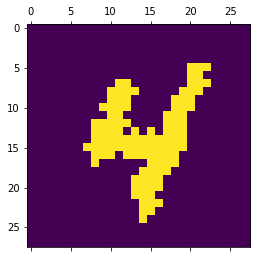

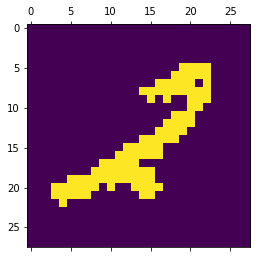

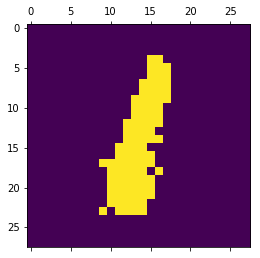

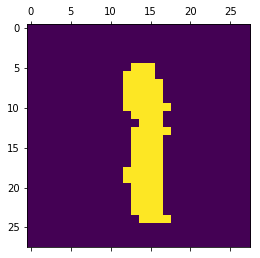

In [6]:
for i in range(5): 
    plt.matshow(data_train['image'][i, :, :])

# Define VAE

In [7]:
vae = mnist_vae_lib.HandwritingVAE()

In [8]:
vae.parameters

<bound method Module.parameters of HandwritingVAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=784, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=10, bias=True)
    (tanh): Tanh()
  )
  (decoder): MLPDecoder(
    (fc1): Linear(in_features=5, out_features=256, bias=True)
    (fc2): Linear(in_features=256, out_features=784, bias=True)
    (sigmoid): Sigmoid()
    (tanh): Tanh()
  )
)>

In [9]:
recon_mean, latent_mean, latent_log_std, latent_params = vae.forward(data_train['image'])

In [10]:
_ = vae.get_loss(data_train['image'], recon_mean, latent_mean, latent_log_std)

# Check training goes through

In [11]:
vae.train_vae(train_loader, test_loader,
                outfile = './test',
                n_epoch = 5, print_every = 2, save_every = 2)

  * init train recon loss: -550.9089966;
  * init test recon loss: -550.8119507;
[1] unlabeled_loss: -10539.51367  	[3.6 seconds]
[2] unlabeled_loss: -12465.96094  	[3.0 seconds]
  * train recon loss: -12472.56836;
  * test recon loss: -12460.01367;
writing the parameters to ./test_epoch2

[3] unlabeled_loss: -12469.68262  	[2.8 seconds]
[4] unlabeled_loss: -12474.26465  	[3.1 seconds]
  * train recon loss: -12471.37793;
  * test recon loss: -12450.46875;
writing the parameters to ./test_epoch4

[5] unlabeled_loss: -12465.55176  	[3.0 seconds]
writing the parameters to ./test_final

